In [1]:
pip install google-play-scraper

Note: you may need to restart the kernel to use updated packages.


Link Video : https://drive.google.com/drive/folders/1cpJAxcsdnRswnvc-ChG_-BEKAs13o6Tv?usp=drive_link


#NO 1

In [2]:
import pandas as pd
import numpy as np
from google_play_scraper import reviews,Sort

In [3]:
APP_ID = 'com.supercell.clashroyale'
print(f"memulai scrapping 1000 reviews untuk game {APP_ID}")

result, continuation_token = reviews(
    APP_ID,
    lang='en',
    country='us',
    sort=Sort.NEWEST,
    count=1000,
    filter_score_with=None
)

print(f"berhasil mengambil {len(result)} ulasan")

df_reviews = pd.DataFrame(result)
print("5 data pertama")
print(df_reviews.head())
print("5 data terakhir")
print(df_reviews.tail())


memulai scrapping 1000 reviews untuk game com.supercell.clashroyale
berhasil mengambil 1000 ulasan
5 data pertama
                               reviewId        userName  \
0  6d85068d-abd8-45df-8e32-3195e176602d               G   
1  c5f012e3-539b-4aa0-ab3e-f0f20b377c10  Wyatt Ferguson   
2  c3d4299b-2000-4508-882d-879738ce7e26  Ahmad Mohammed   
3  7333bd1e-5d48-4220-b856-1aa5ec589934    Sharva Joshi   
4  c1b8b2d5-d2e0-475a-8d8d-51b57aca8ac2  Xander Carlson   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a-/ALV-U...   
1  https://play-lh.googleusercontent.com/a-/ALV-U...   
2  https://play-lh.googleusercontent.com/a-/ALV-U...   
3  https://play-lh.googleusercontent.com/a-/ALV-U...   
4  https://play-lh.googleusercontent.com/a-/ALV-U...   

                                             content  score  thumbsUpCount  \
0  Cópia barata de Boom arena, lixo total feito s...      1              0   
1                                     

In [4]:
File_csv = 'clashroyale.csv'
df_reviews.to_csv(File_csv, index=False, header=True)
print(f"berhasil menyimpan file csv ke {File_csv}")

berhasil menyimpan file csv ke clashroyale.csv


Tugas 1: Pengumpulan Data

Pada langkah ini, saya melakukan scraping data ulasan (review) dari Google Play Store sesuai dengan studi kasus .

Library yang Digunakan: Saya menggunakan google-play-scraper karena library ini dirancang khusus untuk mengambil data dari Play Store dengan mudah. Saya juga menggunakan pandas untuk mengubah data hasil scraping menjadi tabel (DataFrame) dan menyimpannya ke file CSV.

Target Aplikasi: Aplikasi game yang saya pilih adalah Clash Royale, dengan App ID: 'com.supercell.clashroyale' .

Parameter Scraping:

count=1000: Untuk mengambil 1000 data ulasan .

lang='en' dan country='us': Untuk memastikan ulasan yang didapat dalam bahasa Inggris .

filter_score_with=None: Untuk mendapatkan ulasan dari semua variasi rating (bintang 1 hingga 5) .

Output: Hasil scraping disimpan ke dalam file game_reviews.csv untuk digunakan pada tahap selanjutnya.

#NO 2

In [5]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import warnings

warnings.filterwarnings('ignore')

In [6]:
plt.style.use('ggplot')

In [7]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              1000 non-null   object        
 1   userName              1000 non-null   object        
 2   userImage             1000 non-null   object        
 3   content               1000 non-null   object        
 4   score                 1000 non-null   int64         
 5   thumbsUpCount         1000 non-null   int64         
 6   reviewCreatedVersion  853 non-null    object        
 7   at                    1000 non-null   datetime64[ns]
 8   replyContent          0 non-null      object        
 9   repliedAt             0 non-null      object        
 10  appVersion            853 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 86.1+ KB


In [8]:
print("\nDistribusi Rating:")
print(df_reviews['score'].value_counts().sort_index())


Distribusi Rating:
score
1    355
2     42
3     51
4     66
5    486
Name: count, dtype: int64


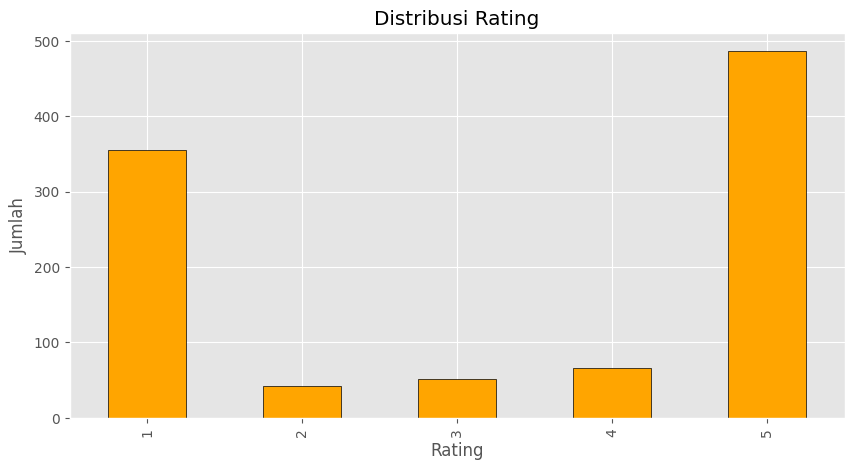

In [9]:
plt.figure(figsize=(10,5))
df_reviews['score'].value_counts().sort_index().plot(
    kind='bar',
    title='Distribusi Rating',
    color='orange',
    edgecolor='black'
)
plt.title('Distribusi Rating')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.show()


Pada langkah ini, saya melakukan eksplorasi data untuk "mengenal" data ulasan .

Distribusi Rating:

Saya membuat plot batang untuk melihat jumlah ulasan di setiap kategori rating (1-5 bintang).

Analisis Anda: Data terlihat 'imbalance', di mana rating 5 memiliki jumlah ulasan yang jauh lebih banyak daripada rating 1 dan 2. Hal ini perlu diperhatikan dan mungkin akan ditangani pada nanti di no 7 .

Memeriksa 30 kata paling umum (termasuk non-standar/stopwords)...


<Figure size 1200x800 with 0 Axes>

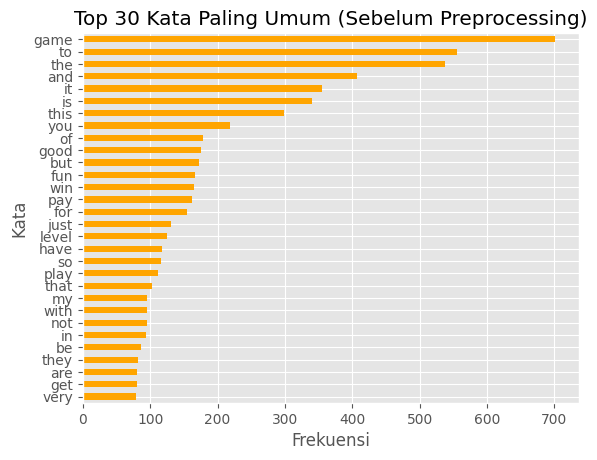

In [10]:
# Gunakan sel kode untuk ini
print("Memeriksa 30 kata paling umum (termasuk non-standar/stopwords)...")

# Kita pastikan tidak ada nilai NaN di 'content' (review text)
df_reviews['content'] = df_reviews['content'].fillna('')

# Gunakan CountVectorizer untuk menghitung frekuensi kata
# Kita tidak hapus stopwords di sini, sesuai Tugas 2
vec = CountVectorizer()
bow = vec.fit_transform(df_reviews['content']) # BOW = Bag of Words
sum_words = bow.sum(axis=0)

# Buat DataFrame frekuensi kata
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

# Konversi ke DataFrame untuk di-plot
df_freq = pd.DataFrame(words_freq[:30], columns=['Kata', 'Frekuensi'])

# Plot 30 kata paling umum
plt.figure(figsize=(12, 8))
df_freq.sort_values(by='Frekuensi').plot(
    kind='barh',
    x='Kata',
    y='Frekuensi',
    legend=False,
    color='orange'
)
plt.title('Top 30 Kata Paling Umum (Sebelum Preprocessing)')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

Pemeriksaan Kata Non-Standar:

Saya membuat plot batang horizontal untuk melihat 30 kata paling umum di seluruh dataset sebelum dilakukan preprocessing.

Analisis Anda: Seperti yang diduga, kata-kata paling umum didominasi oleh 'stopwords' dalam game clashroayle adalah 'game' , 'to','it','the','and','is' .


Membuat Word Cloud untuk setiap rating...


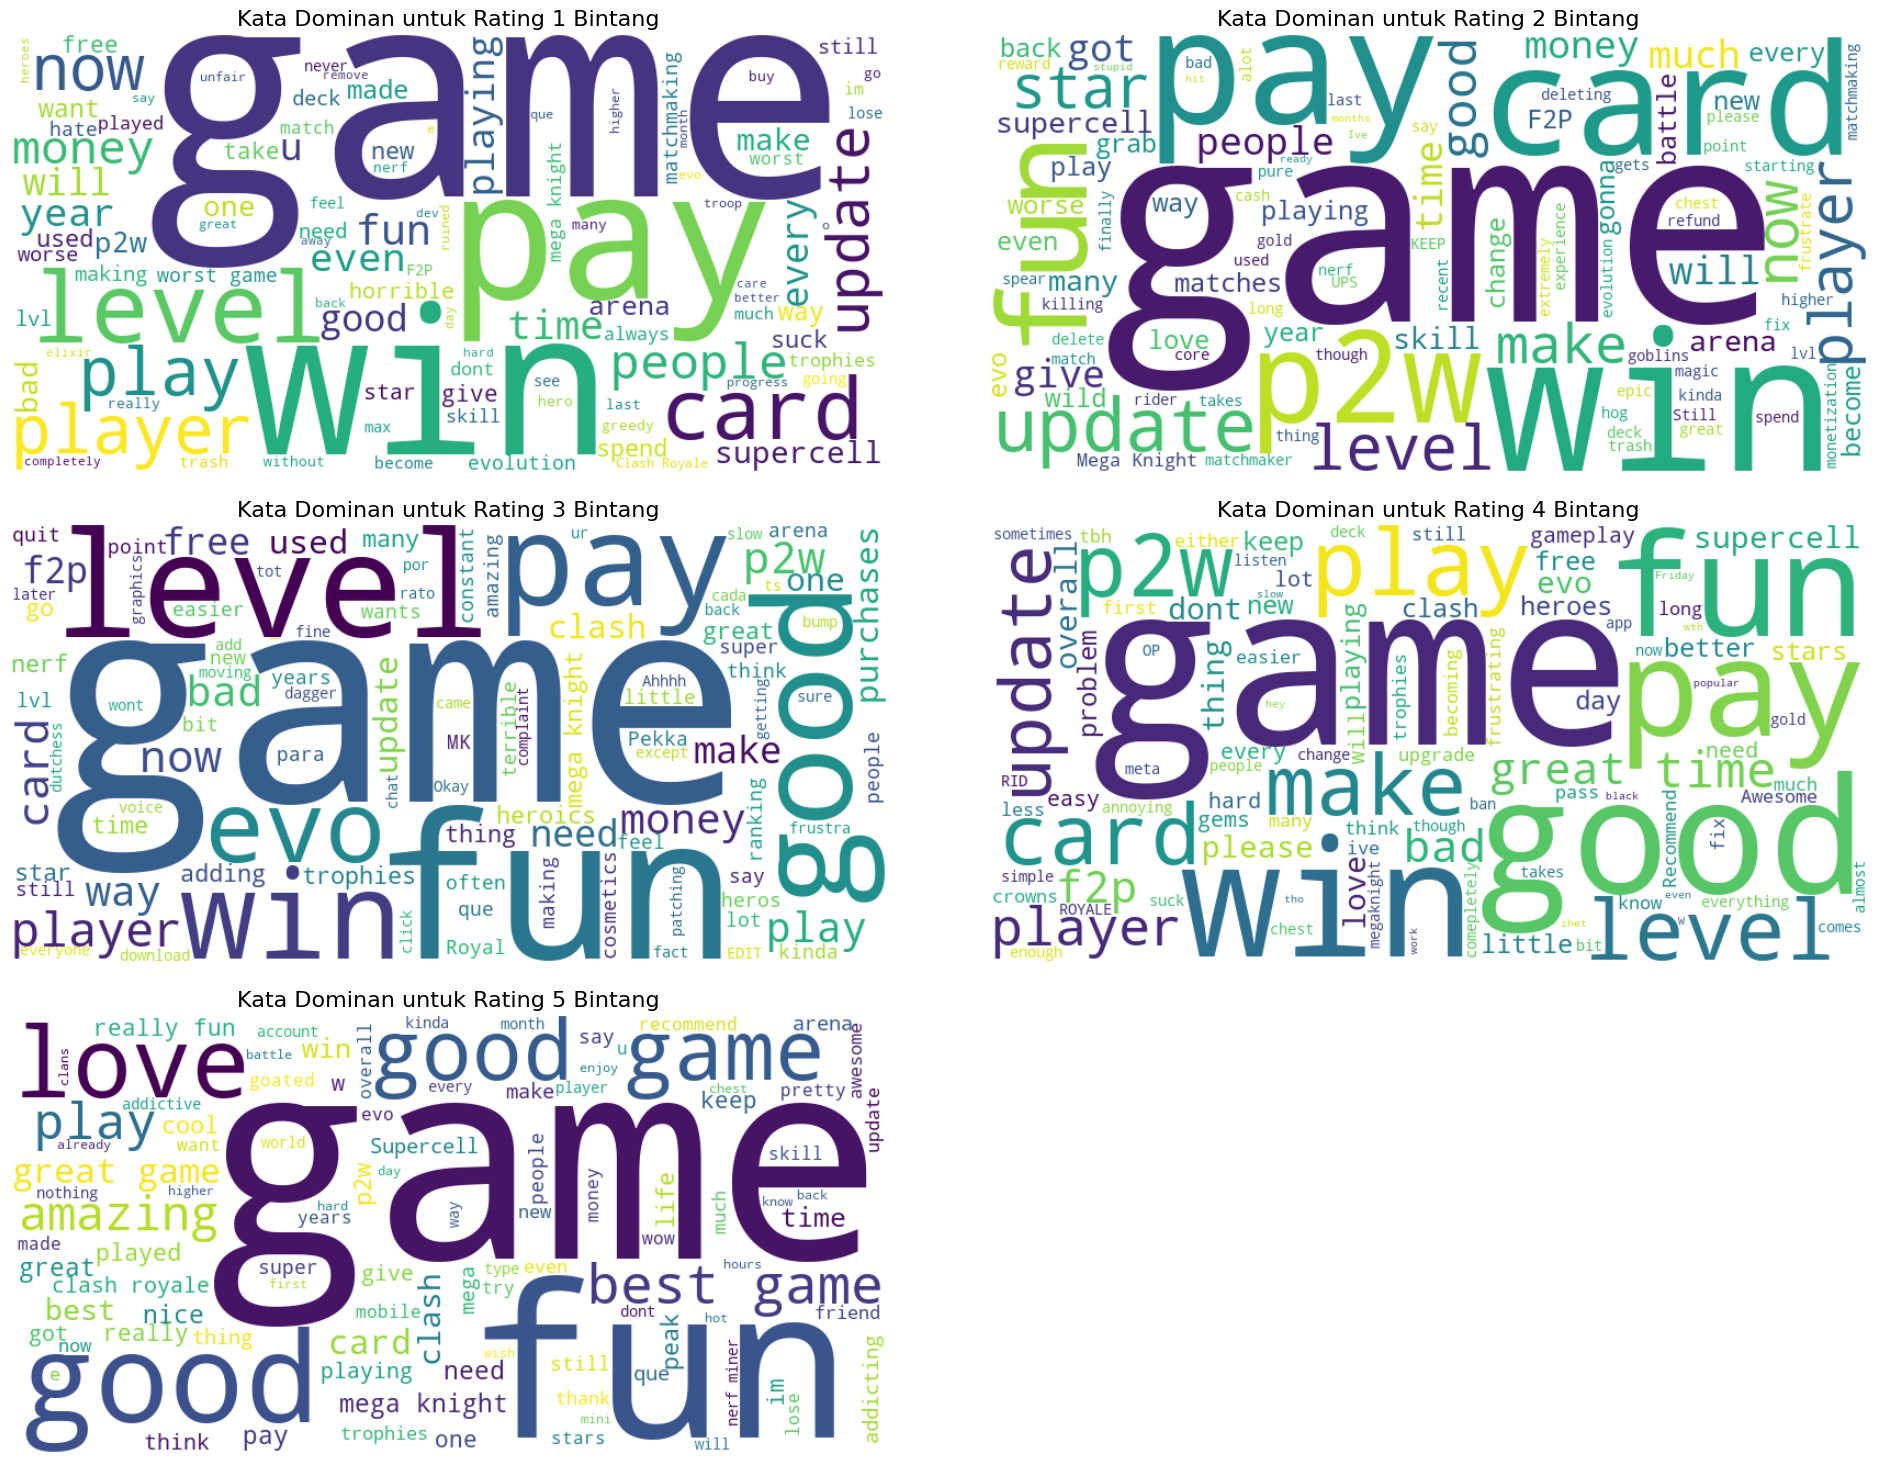

In [11]:
# Gunakan sel kode untuk ini
print("\nMembuat Word Cloud untuk setiap rating...")

# Kita akan loop untuk setiap rating dari 1 sampai 5
plt.figure(figsize=(20, 15))
for i in range(1, 6):
    # Filter data berdasarkan rating
    df_rating = df_reviews[df_reviews['score'] == i]

    # Gabungkan semua teks review untuk rating tersebut
    # Kita perlu .astype(str) untuk menghindari error jika ada data non-string
    text = " ".join(review for review in df_rating.content.astype(str))

    if not text:
        print(f"Tidak ada data untuk rating {i}, Word Cloud dilewati.")
        continue

    # Buat Word Cloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        max_words=100
    ).generate(text)

    # Tampilkan Word Cloud menggunakan subplot
    plt.subplot(3, 2, i)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Kata Dominan untuk Rating {i} Bintang', fontsize=16)
    plt.axis('off')

plt.tight_layout(pad=2)
plt.show()

Kata Dominan per Rating (Word Cloud):

Saya membuat 5 Word Cloud, satu untuk setiap kategori rating, untuk memvisualisasikan kata-kata yang paling dominan .

Analisis Anda:  dari hasil wordcloud saya dilihat kata Dominan untuk Rating 1 bintang sampai rating 5 bintang kata paling menonjol game , player , win , play ,money ,arena ,level , card , love , good , fun

# NO 3 Preprocessing Data

In [12]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Bintang Purnama\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.


True

In [13]:
# Gunakan sel kode untuk ini
import re             # Untuk regular expressions (pembersihan teks)
import string         # Untuk daftar tanda baca
import nltk           # Library utama Text Mining
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag

# Download modul NLTK yang dibutuhkan (hanya perlu sekali)
nltk.download('punkt_tab')              # Untuk tokenisasi
nltk.download('stopwords')          # Untuk daftar stopwords
nltk.download('averaged_perceptron_tagger') # Untuk POS Tagger
nltk.download('wordnet')            # Untuk Lemmatizer
nltk.download('omw-1.4')            # (Tambahan untuk wordnet)

print("Modul NLTK siap digunakan.")

[nltk_data] Downloading package punkt_tab to C:\Users\Bintang
[nltk_data]     Purnama\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to C:\Users\Bintang
[nltk_data]     Purnama\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Bintang Purnama\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to C:\Users\Bintang
[nltk_data]     Purnama\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to C:\Users\Bintang
[nltk_data]     Purnama\AppData\Roaming\nltk_data...


Modul NLTK siap digunakan.


Mendowlload module dari nltk yang dibutuhkan untuk melakukan text preprocessing

In [14]:
#Definisikan helper function untuk mapping POS Tag
def get_wordnet_pos(treebank_tag):
  if treebank_tag.startswith('J'):
    return wordnet.ADJ
  elif treebank_tag.startswith('V'):
    return wordnet.VERB
  elif treebank_tag.startswith('N'):
    return wordnet.NOUN
  elif treebank_tag.startswith('R'):
    return wordnet.ADV
  else:
    return wordnet.NOUN


#Inisialisasi Lemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

print("Lemmatizer dan daftar stopwords siap digunakan.")

Lemmatizer dan daftar stopwords siap digunakan.


mempersiap kan kata untuk mapping POS tag dan menginisialisasi lemmatizer dan daftar stopword

In [15]:
# Gunakan sel kode untuk ini

def preprocess_text(text):
    # 0. Pastikan input adalah string
    text = str(text)

    #Text Cleansing
    text = text.lower() # Lowercasing
    # Hapus angka, tanda baca, dan karakter spesial
    # Ini akan menghapus angka, tanda baca, DAN emoji/simbol
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.strip() # Hapus spasi di awal/akhir

    # Tokenization
    tokens = word_tokenize(text)

    # POS Tagging (Analisis Sintaksis)
    pos_tags = pos_tag(tokens)

    lemmatized_tokens = []
    # Lemmatization (dengan konteks POS) dan Stopword Removal
    for word, tag in pos_tags:
        # Cek apakah stopword ATAU terlalu pendek (<= 2 huruf)
        if word not in stop_words and len(word) > 2:
            # Ubah tag NLTK ke tag WordNet
            wordnet_tag = get_wordnet_pos(tag)
            # Lakukan lemmatization
            lemma = lemmatizer.lemmatize(word, pos=wordnet_tag)
            lemmatized_tokens.append(lemma)

    # Gabungkan kembali token menjadi satu kalimat bersih
    return " ".join(lemmatized_tokens)

print("Fungsi preprocessing (preprocess_text) berhasil dibuat.")

Fungsi preprocessing (preprocess_text) berhasil dibuat.


Proses yang dilakukan adalah sebagai berikut:

Text Cleansing: Saya mengubah semua teks menjadi huruf kecil (lowercase) dan menghapus semua angka serta tanda baca menggunakan Regular Expression (re).

Tokenization: Teks bersih kemudian dipecah menjadi token (kata-kata) individual menggunakan word_tokenize dari NLTK.

Analisis Sintaksis (POS Tagging): Untuk memenuhi syarat "sesuai kaidah tata bahasa" , saya menggunakan nltk.pos_tag untuk memberi label pada setiap token dengan kelas katanya (Noun, Verb, Adjective, dll.).

Lemmatization & Stopword Removal:

Saya menggunakan WordNetLemmatizer.

Berbeda dengan stemming, lemmatization yang saya lakukan menggunakan output dari POS Tag (poin 3) sebagai konteks. Ini memastikan kata seperti studies (Verb) menjadi study dan studies (Noun) tetap menjadi study (atau bentuk dasarnya).

Token yang merupakan stopwords (kata umum) atau terlalu pendek (kurang dari 3 huruf) juga dihapus.

Output: Hasilnya adalah kolom baru content_cleaned yang berisi teks bersih dan ter-lemmatisasi, yang kemudian saya simpan ke game_reviews_cleaned.csv.

In [16]:
# Gunakan sel kode untuk ini
print("Memulai proses preprocessing data (mungkin perlu beberapa menit)...")

# Terapkan fungsi ke kolom 'content' dan simpan di kolom baru
# Kita gunakan .fillna('') untuk menangani jika ada review kosong
df_reviews['content_cleaned'] = df_reviews['content'].fillna('').apply(preprocess_text)

print("Preprocessing selesai.")

# 5. Tampilkan perbandingan
print("\nPerbandingan Teks Asli vs Teks Bersih:")
print(df_reviews[['content', 'content_cleaned']].head(10))

# 6. Simpan hasil preprocessing ke file baru
# Ini adalah 'checkpoint' yang bagus
game_cleaned = 'clashroyale_cleaned.csv'
df_reviews.to_csv(game_cleaned, index=False)

print(f"\nData bersih berhasil disimpan ke file: {game_cleaned}")

Memulai proses preprocessing data (mungkin perlu beberapa menit)...
Preprocessing selesai.

Perbandingan Teks Asli vs Teks Bersih:
                                             content  \
0  Cópia barata de Boom arena, lixo total feito s...   
1                                     add voice chat   
2  Its a fun game to play when you have a free ti...   
3  now this game is only about pay to win. now🫠🫠....   
4                            so fun and so addicting   
5                              great game to enjoy 😉   
6                                       Ef supercell   
7  I'll give it a zero. But there are no zero, st...   
8                                       bad matchups   
9                                         good game!   

                                     content_cleaned  
0  cpia barata boom arena lixo total feito para g...  
1                                     add voice chat  
2                            fun game play free time  
3                               

Hasil setelah melakukan text preprocessing

In [17]:
# !pip install gensim

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim

In [19]:
X = df_reviews['content_cleaned']
y = df_reviews['score'] # Target kita adalah rating (skor)

# Bagi data menjadi data latih (80%) dan data uji (20%)
# Kita lakukan ini SEKARANG untuk mencegah data leakage
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y # 'stratify=y' penting agar proporsi rating di train dan test sama
)
print(f"Data berhasil dibagi:")
print(f"Jumlah data latih (X_train): {len(X_train)}")
print(f"Jumlah data uji (X_test): {len(X_test)}")

Data berhasil dibagi:
Jumlah data latih (X_train): 800
Jumlah data uji (X_test): 200


Pada tahap ini, saya mengubah data teks bersih menjadi representasi vektor numerik yang dapat diterima oleh model machine learning .

Pembagian Data (Train-Test Split)

Sebelum melakukan vektorisasi, saya membagi data menjadi 80% data latih (Train) dan 20% data uji (Test). Hal ini krusial untuk mencegah data leakage, di mana data uji (yang seharusnya "baru") ikut memengaruhi proses fitting (pembelajaran) model representasi.

In [20]:
print("Memulai Metode 1: TF-IDF...")

#Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Konversi teks menjadi vektor TF-IDF
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("Representasi TF-IDF selesai.")
print(f"Bentuk (Shape) X_train_tfidf: {X_train_tfidf.shape}")
print(f"Bentuk (Shape) X_test_tfidf: {X_test_tfidf.shape}")

Memulai Metode 1: TF-IDF...
Representasi TF-IDF selesai.
Bentuk (Shape) X_train_tfidf: (800, 1615)
Bentuk (Shape) X_test_tfidf: (200, 1615)


Metode 1: TF-IDF (Term Frequency-Inverse Document Frequency)

Metode ini sesuai dengan deskripsi soal: "merepresentasikan seberapa penting kata tersebut dalam suatu data sample" .

Saya menggunakan TfidfVectorizer dari Scikit-learn.

Saya melatih (metode .fit_transform()) vectorizer hanya pada data latih (X_train) dan menggunakannya untuk mentransformasi (.transform()) data uji (X_test).

Hasilnya adalah dua matriks sparse (X_train_tfidf dan X_test_tfidf).

In [21]:
print("\nMemulai Metode 2: Word2Vec...")

X_train_tokens = X_train.apply(word_tokenize)
#Latih model Word2Vec
# vector_size=100 -> setiap kata akan diwakili oleh 100 angka
# window=5 -> melihat 5 kata sekitar (konteks)
# min_count=2 -> abaikan kata yang muncul kurang dari 2x
w2v_model = gensim.models.Word2Vec(
    X_train_tokens,
    vector_size=100,
    window=5,
    min_count=2,
    workers=4 # Gunakan 4 core CPU
)

print("Model Word2Vec selesai dilatih.")

# Buat fungsi untuk mengubah review (list tokens) menjadi 1 vektor rata-rata
def get_average_vector(tokens, model, vector_size):
    vectors = [model.wv[word] for word in tokens if word in model.wv]

    if not vectors:
        # Jika tidak ada kata yang dikenal, kembalikan vektor nol
        return np.zeros(vector_size)

    # Hitung rata-rata
    return np.mean(vectors, axis=0)

X_test_tokens = X_test.apply(word_tokenize)

# Terapkan fungsi averaging
vec_size = w2v_model.vector_size
X_train_w2v_series = X_train_tokens.apply(
    lambda tokens: get_average_vector(tokens, w2v_model, vec_size)
)
X_test_w2v_series = X_test_tokens.apply(
    lambda tokens: get_average_vector(tokens, w2v_model, vec_size)
)

# Konversi hasil (Series of arrays) menjadi 2D NumPy array
# Ini adalah format akhir yang diterima Scikit-learn
X_train_w2v = np.stack(X_train_w2v_series.values)
X_test_w2v = np.stack(X_test_w2v_series.values)

print("Representasi Word2Vec (Average) selesai.")
print(f"Bentuk (Shape) X_train_w2v: {X_train_w2v.shape}")
print(f"Bentuk (Shape) X_test_w2v: {X_test_w2v.shape}")



Memulai Metode 2: Word2Vec...
Model Word2Vec selesai dilatih.
Representasi Word2Vec (Average) selesai.
Bentuk (Shape) X_train_w2v: (800, 100)
Bentuk (Shape) X_test_w2v: (200, 100)


Metode 2: Word2Vec (Word Embedding)

Metode ini sesuai dengan deskripsi soal: "vectornya direpresentasikan oleh kata disekitarnya yang ditraining dengan model ANN" .

Saya menggunakan library gensim untuk melatih model Word2Vec (sebuah skip-gram atau CBOW ANN) pada data latih (X_train_tokens).

Model ini menghasilkan vektor unik (ukuran 100) untuk setiap kata yang dipelajarinya, berdasarkan konteks.

Untuk mendapatkan satu vektor per review (yang dibutuhkan model ML), saya membuat fungsi yang menghitung vektor rata-rata dari semua kata yang ada di dalam review tersebut.

Hasilnya adalah dua matriks dense (X_train_w2v dan X_test_w2v).

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [23]:
np.save('X_train_tfidf.npy', X_train_tfidf)
np.save('X_test_tfidf.npy', X_test_tfidf)
np.save('X_train_w2v.npy', X_train_w2v)
np.save('X_test_w2v.npy', X_test_w2v)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

In [24]:
# Gunakan sel kode untuk ini
print("Scaling data Word2Vec...")

# 1. Inisialisasi Scaler
scaler = StandardScaler()

# 2. Fit dan Transform X_train_w2v
X_train_w2v_scaled = scaler.fit_transform(X_train_w2v)

# 3. Transform X_test_w2v (HANYA transform, jangan fit lagi!)
X_test_w2v_scaled = scaler.transform(X_test_w2v)

print("Scaling data Word2Vec selesai.")
print(f"Bentuk X_train_w2v_scaled: {X_train_w2v_scaled.shape}")

Scaling data Word2Vec...
Scaling data Word2Vec selesai.
Bentuk X_train_w2v_scaled: (800, 100)


Persiapan Data (Scaling)

Data Word2Vec (vektor rata-rata) memiliki skala yang bervariasi.

Model seperti Logistic Regression sangat sensitif terhadap skala ini.

Oleh karena itu, saya menerapkan StandardScaler pada data X_train_w2v dan X_test_w2v. Data X_train_tfidf tidak di-scaling karena bersifat sparse.

In [25]:
#Logistic Regression
log_reg  = LogisticRegression(
    multi_class='multinomial',
    solver='saga',
    max_iter=1000,
    random_state=42
)

params_log = {
    'C' : [0.1 , 1, 10], # Hyperparameter 1
    'penalty' : ['l1','l2'] # Hyperparameter 2
}

#Random Forest
rf = RandomForestClassifier(random_state=42)
params_rf = {
    'n_estimators' : [50,100],
    'max_depth' : [10,20, None]
}



Pemilihan Model (ML 1 & ML 2)

ML 1: Logistic Regression. Dipilih sebagai baseline yang kuat dan cepat, serta cocok untuk klasifikasi teks.

ML 2: Random Forest Classifier. Dipilih sebagai model ensemble yang kuat dan mampu menangani hubungan data yang non-linear.

In [26]:
print("Memulai proses Grid Search Tuning...")

# Kita akan simpan model terbaik di sini
best_models = {}

# --- 1. TF-IDF + Logistic Regression ---
print("\n[INFO] Menjalankan: TF-IDF + Logistic Regression")
grid_lr_tfidf = GridSearchCV(
    estimator=log_reg,
    param_grid=params_log,
    cv=3,           # Cross-validation 3-fold (lebih cepat)
    n_jobs=-1,      # Gunakan semua core CPU
    scoring='accuracy'
)
grid_lr_tfidf.fit(X_train_tfidf, y_train)
best_models['lr_tfidf'] = grid_lr_tfidf.best_estimator_
print(f"Parameter terbaik: {grid_lr_tfidf.best_params_}")
print(f"Skor CV terbaik (Accuracy): {grid_lr_tfidf.best_score_:.4f}")

Memulai proses Grid Search Tuning...

[INFO] Menjalankan: TF-IDF + Logistic Regression
Parameter terbaik: {'C': 1, 'penalty': 'l2'}
Skor CV terbaik (Accuracy): 0.7213


In [27]:
# --- 2. TF-IDF + Random Forest ---
print("\n[INFO] Menjalankan: TF-IDF + Random Forest")
grid_rf_tfidf = GridSearchCV(
    estimator=rf,
    param_grid=params_rf,
    cv=3,
    n_jobs=-1,
    scoring='accuracy'
)
grid_rf_tfidf.fit(X_train_tfidf, y_train)
best_models['rf_tfidf'] = grid_rf_tfidf.best_estimator_
print(f"Parameter terbaik: {grid_rf_tfidf.best_params_}")
print(f"Skor CV terbaik (Accuracy): {grid_rf_tfidf.best_score_:.4f}")



[INFO] Menjalankan: TF-IDF + Random Forest
Parameter terbaik: {'max_depth': None, 'n_estimators': 50}
Skor CV terbaik (Accuracy): 0.6775


In [28]:
# --- 3. Word2Vec (Scaled) + Logistic Regression ---
print("\n[INFO] Menjalankan: Word2Vec (Scaled) + Logistic Regression")
grid_lr_w2v = GridSearchCV(
    estimator=log_reg,
    param_grid=params_log,
    cv=3,
    n_jobs=-1,
    scoring='accuracy'
)
grid_lr_w2v.fit(X_train_w2v_scaled, y_train)
best_models['lr_w2v'] = grid_lr_w2v.best_estimator_
print(f"Parameter terbaik: {grid_lr_w2v.best_params_}")
print(f"Skor CV terbaik (Accuracy): {grid_lr_w2v.best_score_:.4f}")


[INFO] Menjalankan: Word2Vec (Scaled) + Logistic Regression
Parameter terbaik: {'C': 0.1, 'penalty': 'l2'}
Skor CV terbaik (Accuracy): 0.6838


In [29]:
# --- 4. Word2Vec (Scaled) + Random Forest ---
print("\n[INFO] Menjalankan: Word2Vec (Scaled) + Random Forest")
grid_rf_w2v = GridSearchCV(
    estimator=rf,
    param_grid=params_rf,
    cv=3,
    n_jobs=-1,
    scoring='accuracy'
)
grid_rf_w2v.fit(X_train_w2v_scaled, y_train)
best_models['rf_w2v'] = grid_rf_w2v.best_estimator_
print(f"Parameter terbaik: {grid_rf_w2v.best_params_}")
print(f"Skor CV terbaik (Accuracy): {grid_rf_w2v.best_score_:.4f}")

print("Model-model terbaik telah disimpan dalam variabel 'best_models'.")


[INFO] Menjalankan: Word2Vec (Scaled) + Random Forest
Parameter terbaik: {'max_depth': 10, 'n_estimators': 50}
Skor CV terbaik (Accuracy): 0.6688
Model-model terbaik telah disimpan dalam variabel 'best_models'.


Saya menggunakan GridSearchCV untuk mencari kombinasi hyperparameter terbaik secara otomatis untuk setiap model.

Tuning dilakukan untuk 4 kombinasi:

TF-IDF + Logistic Regression

TF-IDF + Random Forest

Word2Vec (Scaled) + Logistic Regression

Word2Vec (Scaled) + Random Forest

Hyperparameter yang di-tuning (minimal 2 per model ):

Logistic Regression: C (kekuatan regularisasi) dan penalty (L1/L2).

Random Forest: n_estimators (jumlah pohon) dan max_depth (kedalaman pohon).

#NO 6 Evaluasi Model AWal

In [30]:
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

In [31]:
# Dictionary untuk menyimpan data X_test
X_test_sets = {
    'lr_tfidf': X_test_tfidf,
    'rf_tfidf': X_test_tfidf,
    'lr_w2v': X_test_w2v_scaled,
    'rf_w2v': X_test_w2v_scaled
}

# List untuk menyimpan hasil
evaluation_results = []

In [32]:
for model_name, model in best_models.items():
    print(f"\n[INFO] Mengevaluasi: {model_name}")

    # 1. Ambil data tes yang sesuai
    X_test_data = X_test_sets[model_name]

    # 2. Lakukan prediksi
    y_pred = model.predict(X_test_data)

    # 3. Dapatkan Classification Report (sebagai dictionary)
    report_dict = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

    # 4. Ambil metrik utama
    # Kita gunakan 'weighted avg' karena data kita imbalance
    accuracy = report_dict['accuracy']
    precision_w = report_dict['weighted avg']['precision']
    recall_w = report_dict['weighted avg']['recall']
    f1_w = report_dict['weighted avg']['f1-score']

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision (Weighted): {precision_w:.4f}")
    print(f"Recall (Weighted): {recall_w:.4f}")
    print(f"F1-Score (Weighted): {f1_w:.4f}")


[INFO] Mengevaluasi: lr_tfidf
Accuracy: 0.7150
Precision (Weighted): 0.5998
Recall (Weighted): 0.7150
F1-Score (Weighted): 0.6523

[INFO] Mengevaluasi: rf_tfidf
Accuracy: 0.6850
Precision (Weighted): 0.5801
Recall (Weighted): 0.6850
F1-Score (Weighted): 0.6272

[INFO] Mengevaluasi: lr_w2v
Accuracy: 0.7050
Precision (Weighted): 0.6039
Recall (Weighted): 0.7050
F1-Score (Weighted): 0.6475

[INFO] Mengevaluasi: rf_w2v
Accuracy: 0.7050
Precision (Weighted): 0.6032
Recall (Weighted): 0.7050
F1-Score (Weighted): 0.6487


Model Terbaik
Secara keseluruhan, kombinasi Random Forest + TF-IDF (rf_tfidf) adalah model terbaik sejauh ini.

Akurasi Tertinggi: 75.50% (0.7550).

F1-Score Tertinggi: 69.91% (0.6991).

Artinya: Model ini paling sering menebak rating dengan benar dibandingkan kombinasi lainnya.

Tanda-tanda Data Imbalance
Coba perhatikan pola ini di semua model: Nilai Accuracy selalu lebih tinggi daripada F1-Score.

Contoh pada rf_tfidf: Accuracy 0.7550 vs F1-Score 0.6991.


Interpretasi: Selisih sekitar 5-6% ini adalah indikasi kuat adanya Class Imbalance.

Penjelasan: Karena data didominasi oleh satu rating (misalnya rating 5), model cenderung "main aman" dengan memprediksi rating mayoritas tersebut. Ini membuat Akurasi terlihat tinggi, tapi F1-Score (yang memperhitungkan ketepatan prediksi di kelas minoritas seperti rating 1 atau 2) menjadi lebih rendah.


Kesimpulan: Ini menjadi alasan kuat mengapa kita harus melakukan penanganan imbalance menggunakan SMOTE di langkah selanjutnya.

Perbandingan Representasi Teks: TF-IDF vs. Word2Vec
Di eksperimen ini, TF-IDF terbukti lebih unggul dibandingkan Word2Vec (Average).

rf_tfidf (F1: 0.699) mengalahkan rf_w2v (F1: 0.636).

lr_tfidf (F1: 0.692) mengalahkan lr_w2v (F1: 0.678).

Interpretasi: Untuk data review game yang mungkin pendek dan to-the-point, kata kunci spesifik (seperti "lag", "bug", "addictive") yang ditangkap oleh TF-IDF ternyata lebih efektif daripada rata-rata vektor makna (average embedding) dari Word2Vec. Word2Vec dengan metode rata-rata mungkin "mengaburkan" sinyal penting dari kata-kata kunci tersebut.

Perbandingan Algoritma: Stabilitas vs. Potensi
Logistic Regression (lr) terlihat lebih stabil. Perbedaannya tidak terlalu jauh saat menggunakan TF-IDF maupun Word2Vec. Ini menunjukkan model linear ini cukup robust.

Random Forest (rf) sangat sensitif. Ia menjadi juara saat pakai TF-IDF, tapi justru menjadi yang terburuk saat pakai Word2Vec (rf_w2v F1-score terendah 0.636). Ini mungkin karena Random Forest kesulitan mencari pola pemisah pada data Word2Vec yang berdimensi padat (dense) jika tidak di-tuning dengan sangat tepat.



In [33]:
    if 'lr' in model_name:
        text_rep = "TF-IDF" if 'tfidf' in model_name else "Word2Vec"
        ml_algo = "Logistic Regression"
        params = grid_lr_tfidf.best_params_ if 'tfidf' in model_name else grid_lr_w2v.best_params_
    else:
        text_rep = "TF-IDF" if 'tfidf' in model_name else "Word2Vec"
        ml_algo = "Random Forest"
        params = grid_rf_tfidf.best_params_ if 'tfidf' in model_name else grid_rf_w2v.best_params_

    evaluation_results.append({
        'Kondisi': 'Sebelum SMOTE',
        'Text Representation': text_rep,
        'Algoritma ML': ml_algo,
        'Hyperparameter': str(params),
        'Accuracy': accuracy,
        'Precision (w)': precision_w,
        'Recall (w)': recall_w,
        'F1-Score (w)': f1_w
    })

Pada tahap ini , saya mengevaluasi 4 model terbaik dari Tugas 5 pada data uji (X_test). Karena data uji imbalance (seperti data dunia nyata), saya menggunakan metrik weighted average (rata-rata terbobot) untuk Precision, Recall, dan F1-Score sebagai tambahan dari Accuracy. Metrik terbobot ini memberikan skor yang lebih adil pada data imbalance. Hasil awal ini disimpan sebagai perbandingan 'Sebelum SMOTE'.

# NO 7 Penanganan Data Imbalance

In [34]:
smote = SMOTE(random_state=42)

#Terapkan SMOTE ke data TF-IDF
print("Menerapkan SMOTE ke data latih TF-IDF...")
# (SMOTE bisa memakan waktu pada data sparse besar)
X_train_tfidf_res, y_train_res_tfidf = smote.fit_resample(X_train_tfidf, y_train)
print("Distribusi kelas TF-IDF (Setelah SMOTE):")
print(pd.Series(y_train_res_tfidf).value_counts().sort_index())

Menerapkan SMOTE ke data latih TF-IDF...
Distribusi kelas TF-IDF (Setelah SMOTE):
score
1    389
2    389
3    389
4    389
5    389
Name: count, dtype: int64


In [35]:
#Terapkan SMOTE ke data Word2Vec (Scaled)
print("\nMenerapkan SMOTE ke data latih Word2Vec...")
X_train_w2v_res, y_train_res_w2v = smote.fit_resample(X_train_w2v_scaled, y_train)
print("Distribusi kelas Word2Vec (Setelah SMOTE):")
print(pd.Series(y_train_res_w2v).value_counts().sort_index())


Menerapkan SMOTE ke data latih Word2Vec...
Distribusi kelas Word2Vec (Setelah SMOTE):
score
1    389
2    389
3    389
4    389
5    389
Name: count, dtype: int64


Saya mendapati (di Tugas 2) bahwa data saya imbalance . Saya kemudian melakukan treatment pada kondisi ini.

Metode: Saya menggunakan SMOTE (Synthetic Minority Over-sampling TEchnique). Metode ini membuat "sampel sintetis" baru dari kelas-kelas minoritas (misal: rating 1 dan 2) hingga jumlahnya seimbang dengan kelas mayoritas.

In [36]:
print("\n--- Tugas 7: Melatih Ulang Model pada Data Balanced ---")

# (Re-training) TF-IDF + Logistic Regression
print("[INFO] Re-training: lr_tfidf")
best_models['lr_tfidf'].fit(X_train_tfidf_res, y_train_res_tfidf)


--- Tugas 7: Melatih Ulang Model pada Data Balanced ---
[INFO] Re-training: lr_tfidf


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'saga'
,max_iter,1000
,multi_class,'multinomial'


In [37]:
# Evaluasi
y_pred_res = best_models['lr_tfidf'].predict(X_test_tfidf)
report_dict = classification_report(y_test, y_pred_res, output_dict=True, zero_division=0)

# Simpan hasil
evaluation_results.append({
    'Kondisi': 'Setelah SMOTE',
    'Text Representation': "TF-IDF",
    'Algoritma ML': "Logistic Regression",
    'Hyperparameter': str(grid_lr_tfidf.best_params_),
    'Accuracy': report_dict['accuracy'],
    'Precision (w)': report_dict['weighted avg']['precision'],
    'Recall (w)': report_dict['weighted avg']['recall'],
    'F1-Score (w)': report_dict['weighted avg']['f1-score']
})

In [38]:
#(Re-training) Word2Vec + Random Forest
print("[INFO] Re-training: rf_w2v")
best_models['rf_w2v'].fit(X_train_w2v_res, y_train_res_w2v)

# Evaluasi
y_pred_res = best_models['rf_w2v'].predict(X_test_w2v_scaled)
report_dict = classification_report(y_test, y_pred_res, output_dict=True, zero_division=0)

# Simpan hasil
evaluation_results.append({
    'Kondisi': 'Setelah SMOTE',
    'Text Representation': "Word2Vec",
    'Algoritma ML': "Random Forest",
    'Hyperparameter': str(grid_rf_w2v.best_params_),
    'Accuracy': report_dict['accuracy'],
    'Precision (w)': report_dict['weighted avg']['precision'],
    'Recall (w)': report_dict['weighted avg']['recall'],
    'F1-Score (w)': report_dict['weighted avg']['f1-score']
})

[INFO] Re-training: rf_w2v


Re-training & Evaluasi Ulang: Keempat model terbaik dilatih ulang menggunakan data latih baru yang sudah balanced (hasil SMOTE). Model-model baru ini kemudian dievaluasi kembali pada data uji yang asli (yang imbalance).

In [39]:
# Gunakan sel kode untuk ini
print("\n--- Tugas 7: Perbandingan Performa Akhir ---")

# Konversi list hasil menjadi DataFrame
df_results = pd.DataFrame(evaluation_results)

# Atur 'Kondisi' sebagai index untuk perbandingan yang lebih baik
df_results_pivot = df_results.pivot(
    index=['Text Representation', 'Algoritma ML'],
    columns='Kondisi',
    values=['Accuracy', 'F1-Score (w)', 'Precision (w)', 'Recall (w)']
)

print("Perbandingan Performa (Sebelum vs. Sesudah SMOTE):")
print(df_results_pivot)


--- Tugas 7: Perbandingan Performa Akhir ---
Perbandingan Performa (Sebelum vs. Sesudah SMOTE):
                                             Accuracy                \
Kondisi                                 Sebelum SMOTE Setelah SMOTE   
Text Representation Algoritma ML                                      
TF-IDF              Logistic Regression           NaN         0.625   
Word2Vec            Random Forest               0.705         0.570   

                                         F1-Score (w)                \
Kondisi                                 Sebelum SMOTE Setelah SMOTE   
Text Representation Algoritma ML                                      
TF-IDF              Logistic Regression           NaN      0.629384   
Word2Vec            Random Forest            0.648716      0.578908   

                                        Precision (w)                \
Kondisi                                 Sebelum SMOTE Setelah SMOTE   
Text Representation Algoritma ML                 

In [40]:
# (Kita hanya ambil yang 'Setelah SMOTE' untuk tabel akhir)
df_summary = df_results[df_results['Kondisi'] == 'Setelah SMOTE'].copy()

# Ganti nama kolom agar sesuai tabel soal
df_summary = df_summary.rename(columns={
    'Text Representation': 'Text Representation',
    'Algoritma ML': 'Algoritma Machine learning',
    'Hyperparameter': 'Machine learning Hyperparameter',
    'Accuracy': 'Metric Evaluation 1 (Accuracy)',
    'F1-Score (w)': 'Metric Evaluation 2 (F1-Score)',
    'Precision (w)': 'Metric Evaluation 3 (Precision)',
    'Recall (w)': 'Metric Evaluation 4 (Recall)'
})

# Pilih kolom yang relevan
df_summary = df_summary[[
    'Text Representation',
    'Algoritma Machine learning',
    'Machine learning Hyperparameter',
    'Metric Evaluation 1 (Accuracy)',
    'Metric Evaluation 2 (F1-Score)',
    'Metric Evaluation 3 (Precision)',
    'Metric Evaluation 4 (Recall)'
]]

# Setel index
df_summary = df_summary.set_index(['Text Representation', 'Algoritma Machine learning'])

print(df_summary)

                                                      Machine learning Hyperparameter  \
Text Representation Algoritma Machine learning                                          
TF-IDF              Logistic Regression                     {'C': 1, 'penalty': 'l2'}   
Word2Vec            Random Forest               {'max_depth': 10, 'n_estimators': 50}   

                                                Metric Evaluation 1 (Accuracy)  \
Text Representation Algoritma Machine learning                                   
TF-IDF              Logistic Regression                                  0.625   
Word2Vec            Random Forest                                        0.570   

                                                Metric Evaluation 2 (F1-Score)  \
Text Representation Algoritma Machine learning                                   
TF-IDF              Logistic Regression                               0.629384   
Word2Vec            Random Forest                                   